# **Basic Python**

## 1.a 
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below: <br>
Ex: **n = 3**

--A--<br>
-BAB-<br>
CBABC<br>

**n = 4**

---A---<br>
--BAB--<br>
-CBABC-<br>
DCBABCD

In [286]:
def F(n):
    for i in range(n):
        s = ''
        for j in range(n - i - 1):
            s += '-'
        for k in range(i + 1):
            s += chr(65 + k)
        for k in range(i - 1, -1, -1):
            s += chr(65 + k)
        for j in range(n - i - 1):
            s += '-'
        print(s)
        pass

# Tests
F(10)
F(6)

---------A---------
--------ABA--------
-------ABCBA-------
------ABCDCBA------
-----ABCDEDCBA-----
----ABCDEFEDCBA----
---ABCDEFGFEDCBA---
--ABCDEFGHGFEDCBA--
-ABCDEFGHIHGFEDCBA-
ABCDEFGHIJIHGFEDCBA
-----A-----
----ABA----
---ABCBA---
--ABCDCBA--
-ABCDEDCBA-
ABCDEFEDCBA


## 1.b
Make a function F that takes only one argument, a dictionary(dict) d.
The keys of d are integers and the values of d are a tuple of type (x (int), y (int)).
You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [287]:
def F(d):
    for key, value in sorted(d.items()):
        print(f"{key}, {value[0]}, {value[1]}")

    print("\n")

    for key, value in sorted(d.items(), key=lambda x: x[1][0], reverse=True):
        print(f"{key}, {value[0]}, {value[1]}")

    print("\n")

    for key, value in sorted(d.items(), key=lambda x: x[1][1]):
        print(f"{key}, {value[0]}, {value[1]}")
    pass

# Tests
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

1, 1, 2
2, -1, 4
4, 2, 3
5, -4, 3


4, 2, 3
1, 1, 2
2, -1, 4
5, -4, 3


1, 1, 2
5, -4, 3
4, 2, 3
2, -1, 4
-8, 4, 2
5, 9, -10
6, -3, 4
7, 2, 1


5, 9, -10
-8, 4, 2
7, 2, 1
6, -3, 4


5, 9, -10
7, 2, 1
-8, 4, 2
6, -3, 4


## 2 Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


#### 2.a: open the student_records.csv file and print out the first 10 rows

In [288]:
#TODO

file_path =  "/Users/maharshiupadhyay/Downloads/student_records.csv"

def read_csv_file(file_path):
    try:
        with open(file_path, "r") as file:
            lines = file.readlines()
            return lines
    except FileNotFoundError:
        print("The file does not exist.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def extract_header_and_rows(lines):
    if lines is None:
        return None, None
    header = lines[0].strip().split(",")
    data = [line.strip().split(",") for line in lines[1:]]
    return header, data

def print_header(header):
    print("Header:", header)

def print_rows(header, data, num_rows):
    for i, row in enumerate(data[:num_rows]):
        row_dict = {header[j]: row[j] for j in range(len(header))}
        print(f"Row {i + 1}: {row_dict}")

def main():
    lines = read_csv_file(file_path)
    header, data = extract_header_and_rows(lines)
    if header is not None and data is not None:
        print_header(header)
        print("\nFirst 10 Rows:")
        print_rows(header, data, 10)

if __name__ == "__main__":
    main()

Header: ['roll_number', 'department', 'credit', 'course_name', 'course_type', 'grade']

First 10 Rows:
Row 1: {'roll_number': '588946', 'department': 'MA', 'credit': '3', 'course_name': 'EC250', 'course_type': 'hasmed_elective', 'grade': 'AB'}
Row 2: {'roll_number': '145372', 'department': 'EP', 'credit': '4', 'course_name': 'EP407', 'course_type': 'hasmed_elective', 'grade': 'CC'}
Row 3: {'roll_number': '834515', 'department': 'MA', 'credit': '8', 'course_name': 'EP885', 'course_type': 'hasmed_elective', 'grade': 'BB'}
Row 4: {'roll_number': '344265', 'department': 'CSE', 'credit': '6', 'course_name': 'CSE699', 'course_type': 'honours', 'grade': 'AB'}
Row 5: {'roll_number': '358405', 'department': 'MA', 'credit': '3', 'course_name': 'EE460', 'course_type': 'minor', 'grade': 'AP'}
Row 6: {'roll_number': '781075', 'department': 'CE', 'credit': '8', 'course_name': 'CE540', 'course_type': 'honours', 'grade': 'CC'}
Row 7: {'roll_number': '180828', 'department': 'CSE', 'credit': '6', 'cours

#### 2.b: Print out the total credits and calculte CPI of each student. 
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=9, BC=7, CC=6)

In [289]:
#TODO

#Note : you guys ,by mistake , wrote BB = 9 but it's 8  , so I'm using BB = 8

# Define a dictionary to map grades to their corresponding numeric values
GRADE_TO_POINTS = {
    "AP": 10,
    "AA": 10,
    "AB": 9,
    "BB": 8,
    "BC": 7,
    "CC": 6
}

def calculate_cpi(file_path):
    """
    Calculate the Cumulative Performance Index (CPI) for each student.

    Args:
        file_path (str): The path to the CSV file containing student records.

    Returns:
        None
    """

    # Initialize an empty dictionary to store student data
    student_data = {}

    try:
        # Open the CSV file in read mode
        with open(file_path, "r") as file:
            # Read all lines from the file
            lines = file.readlines()

            # Skip the header and parse rows
            header = lines[0].strip().split(",")
            data = [line.strip().split(",") for line in lines[1:]]

            # Iterate over rows and process data
            for row in data:
                student_id = row[0]
                credits = int(row[2])  # Credits column (3rd position, index 2)
                grade = row[5]  # Grade column (6th position, index 5)

                # Initialize student data if not already present
                if student_id not in student_data:
                    student_data[student_id] = {"total_credits": 0, "weighted_points": 0}

                # Add to total credits
                student_data[student_id]["total_credits"] += credits

                # Calculate weighted points based on grade
                if grade in GRADE_TO_POINTS:
                    student_data[student_id]["weighted_points"] += GRADE_TO_POINTS[grade] * credits

    except FileNotFoundError:
        print("The file does not exist.")
        return

    # Calculate and print CPI for each student
    print("Student ID | Total Credits | CPI")
    print("--------------------------------")
    for student_id, info in student_data.items():
        total_credits = info["total_credits"]
        cpi = info["weighted_points"] / total_credits if total_credits > 0 else 0
        print(f"{student_id:<10} | {total_credits:<13} | {cpi:.2f}")

# Example usage
calculate_cpi("/Users/maharshiupadhyay/Downloads/student_records.csv")

Student ID | Total Credits | CPI
--------------------------------
588946     | 199           | 8.69
145372     | 173           | 7.75
834515     | 199           | 8.22
344265     | 153           | 8.70
358405     | 206           | 8.59
781075     | 246           | 8.17
180828     | 177           | 8.10
981238     | 168           | 8.24
836881     | 246           | 8.39
310604     | 198           | 8.33
847809     | 261           | 8.21
773982     | 264           | 8.07
500658     | 208           | 8.17
810863     | 192           | 8.15
124663     | 229           | 8.13
364146     | 225           | 8.40
871746     | 216           | 8.21
270007     | 241           | 8.03
597353     | 200           | 8.12
986057     | 199           | 8.07
718510     | 184           | 8.43
836431     | 160           | 7.90
379479     | 260           | 8.25
582912     | 221           | 8.66
788020     | 193           | 8.02
613401     | 209           | 8.44
144528     | 228           | 8.16
485484     | 216

#### 2.c: Print out the names of all students who meet the graduation requirements 
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [290]:
#TODO

from collections import defaultdict

# Define the credit requirements
CREDIT_REQUIREMENTS = {
    "core": 20,
    "department_elective": 15,
    "flexible_elective": 10,
    "hasmed_elective": 5,
}

def initialize_student_credits():
    return {
        "core": 0,
        "department_elective": 0,
        "flexible_elective": 0,
        "hasmed_elective": 0,
    }

FILE_PATH = "/Users/maharshiupadhyay/Downloads/student_records.csv"

def read_file(file_path):
    try:
        with open(file_path, "r") as file:
            return file.readlines()
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return []

def parse_file(lines):
    header = lines[0].strip().split(",")
    headers_index = {header[i]: i for i in range(len(header))}
    student_credits = defaultdict(initialize_student_credits)

    for line in lines[1:]:
        record = line.strip().split(",")
        roll_number = record[headers_index["roll_number"]]
        credit = int(record[headers_index["credit"]])
        course_type = record[headers_index["course_type"]]

        # Aggregate credits based on course type
        if course_type in student_credits[roll_number]:
            student_credits[roll_number][course_type] += credit

    return student_credits

def check_eligibility(student_credits):
    eligible_students = []
    for roll_number, credits in student_credits.items():
        if all(credits[course_type] >= CREDIT_REQUIREMENTS[course_type] for course_type in CREDIT_REQUIREMENTS):
            eligible_students.append(roll_number)
    return eligible_students

def print_eligible_students(eligible_students):
    print("Students who meet graduation requirements:")
    if eligible_students:
        for student in eligible_students:
            print(student)
    else:
        print("No students meet the requirements.")

def main():
    lines = read_file(FILE_PATH)
    if lines:
        student_credits = parse_file(lines)
        eligible_students = check_eligibility(student_credits)
        print_eligible_students(eligible_students)

if __name__ == "__main__":
    main()

Students who meet graduation requirements:
588946
834515
781075
180828
981238
836881
310604
773982
500658
810863
124663
871746
986057
379479
144528
485484
845623
150503
214270
517837
482623
721490
955757
143856
571782
973158
703403
960395
521087
461971
879634
716985
265922
283796
203200
327122
534763
391848
971123
207443
488661
782129
928288
581858
282482
572815
608952
628849
630568
388969
159438
970791
143142
998293
681499
888886
608522
362471
692318
626000
581065
787967
381227
750259
881983
294697


#### 2.d: Print out the names of all students who completed a minor 
Atleast 10 credits with minor tag in a specific department

In [291]:
#TODO
from collections import defaultdict

MINOR_CREDIT_REQUIREMENT = 10
SPECIFIC_DEPARTMENT = "CSE"
student_minor_credits = defaultdict(lambda: defaultdict(int))

FILE_PATH = "/Users/maharshiupadhyay/Downloads/student_records.csv"

def read_file(file_path):
    try:
        with open(file_path, "r") as file:
            lines = file.readlines()
            return lines
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return []

def parse_file(lines):
    if not lines:
        return []

    header = lines[0].strip().split(",")
    headers_index = {header[i]: i for i in range(len(header))}
    student_records = []

    for line in lines[1:]:
        record = line.strip().split(",")
        roll_number = record[headers_index["roll_number"]]
        credit = int(record[headers_index["credit"]])
        course_type = record[headers_index["course_type"]]
        department = record[headers_index["department"]]

        student_records.append({
            "roll_number": roll_number,
            "credit": credit,
            "course_type": course_type,
            "department": department
        })

    return student_records

def aggregate_minor_credits(student_records):
    for record in student_records:
        if record["course_type"] == "minor" and record["department"] == SPECIFIC_DEPARTMENT:
            student_minor_credits[record["roll_number"]][record["department"]] += record["credit"]

def get_eligible_students():
    eligible_students = [
        roll_number
        for roll_number, credits in student_minor_credits.items()
        if credits[SPECIFIC_DEPARTMENT] >= MINOR_CREDIT_REQUIREMENT
    ]
    return eligible_students

def print_eligible_students(eligible_students):
    print(f"Students who completed a minor in {SPECIFIC_DEPARTMENT}:")
    if eligible_students:
        for student in eligible_students:
            print(student)
    else:
        print(f"No students completed a minor in {SPECIFIC_DEPARTMENT}.")

def main():
    lines = read_file(FILE_PATH)
    student_records = parse_file(lines)
    aggregate_minor_credits(student_records)
    eligible_students = get_eligible_students()
    print_eligible_students(eligible_students)

if __name__ == "__main__":
    main()

Students who completed a minor in CSE:
180828
143142
907454
597353
344265
388969
851029
572815
521087
692318


#### 2.e: Print out the names of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [292]:
#TODO
from collections import defaultdict

CREDIT_REQUIREMENTS = {
    "honours": 10,
    "core": 20,
}

student_credits = defaultdict(lambda: {"honours": 0, "core": 0})

STUDENT_RECORDS_FILE_PATH = "/Users/maharshiupadhyay/Downloads/student_records.csv"

def load_student_records(file_path):
    """Load student records from a CSV file."""
    try:
        with open(file_path, "r") as file:
            lines = file.readlines()
            header = lines[0].strip().split(",")
            headers_index = {header[i]: i for i in range(len(header))}
            return lines[1:], headers_index
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return [], {}

def aggregate_credits(student_records, headers_index):
    """Aggregate credits for each student by course type."""
    for line in student_records:
        record = line.strip().split(",")
        roll_number = record[headers_index["roll_number"]]
        credit = int(record[headers_index["credit"]])
        course_type = record[headers_index["course_type"]]
        if course_type in student_credits[roll_number]:
            student_credits[roll_number][course_type] += credit

def get_eligible_students(student_credits):
    """Get students who meet the honours and core credit requirements."""
    eligible_students = []
    for roll_number, credits in student_credits.items():
        if (credits["honours"] >= CREDIT_REQUIREMENTS["honours"] and
            credits["core"] >= CREDIT_REQUIREMENTS["core"]):
            eligible_students.append(roll_number)
    return eligible_students

def print_eligible_students(eligible_students):
    """Print the eligible students."""
    print("Students who completed an honours degree:")
    if eligible_students:
        for student in eligible_students:
            print(student)
    else:
        print("No students completed an honours degree.")

def main():
    student_records, headers_index = load_student_records(STUDENT_RECORDS_FILE_PATH)
    aggregate_credits(student_records, headers_index)
    eligible_students = get_eligible_students(student_credits)
    print_eligible_students(eligible_students)

if __name__ == "__main__":
    main()

Students who completed an honours degree:
588946
145372
834515
781075
836881
310604
773982
500658
810863
124663
364146
871746
986057
718510
379479
582912
788020
613401
144528
485484
199713
845623
150503
214270
517837
482623
721490
955757
589528
143856
571782
973158
703403
960395
521087
461971
879634
716985
265922
283796
203200
327122
534763
391848
971123
207443
488661
782129
928288
581858
282482
572815
608952
628849
630568
388969
159438
870642
970791
143142
998293
681499
888886
608522
362471
465496
208100
692318
626000
458200
581065
787967
750259
881983
294697


# **SciPy** 

## Part A
Minimize the function $f(x, y) = 2(x - y - 3)^2 + 4(x + 2y + 1)^4$.<br>
With the constraints : $ x - y \ge -3, (x + 2)^2 + (y + 1)^2 \le 5$ <br>
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [293]:
#TODO
import numpy as np
from scipy.optimize import minimize

def calculate_objective(x, y):
    return 2 * (x - y - 3)**2 + 4 * (x + 2 * y + 1)**4

def calculate_constraint1(x, y):
    return x - y + 3

def calculate_constraint2(x, y):
    return 5 - ((x + 2)**2 + (y + 1)**2)

def objective(vars):
    x, y = vars
    return calculate_objective(x, y)

def constraint1(vars):
    x, y = vars
    return calculate_constraint1(x, y)

def constraint2(vars):
    x, y = vars
    return calculate_constraint2(x, y)

def main():
    initial_guess = [0, 0]
    constraints = [
        {'type': 'ineq', 'fun': constraint1},
        {'type': 'ineq', 'fun': constraint2}
    ]

    result = minimize(objective, initial_guess, method='SLSQP', constraints=constraints)

    print("Optimal solution:", result.x)
    print("Function value at optimal solution:", result.fun)
    print("Success:", result.success)
    print("Message:", result.message)

if __name__ == "__main__":
    main()

Optimal solution: [ 0.23492503 -0.92851488]
Function value at optimal solution: 7.345026216977713
Success: True
Message: Optimization terminated successfully


# Part B
Evaluate the line integral of the function $f(x, y) = x^2 + y^4$ along the circle $ x^2 + y^2 = 3 $ anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

In [294]:
#TODO
import numpy as np
from scipy.integrate import quad

# now we will define the function
def f(x, y):
    return x**2 + y**4

#  let is now define the parameterization of the circle
def x(t):
    return np.sqrt(3) * np.cos(t)

def y(t):
    return np.sqrt(3) * np.sin(t)

# and now we will define the integrand
def integrand(t):
    return f(x(t), y(t)) * np.sqrt((x(t).diff(t))**2 + (y(t).diff(t))**2)

# now convert the integrand to a numpy-compatible function
def integrand_np(t):
    return (np.sqrt(3) * np.cos(t))**2 + (np.sqrt(3) * np.sin(t))**4 * np.sqrt(3)

# now we will perform integration
result, error = quad(integrand_np, 0, 2*np.pi)

print(result)

46.15421508651228


# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [295]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [296]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2

import numpy as np

def load_data(data_path):
    """
    Load 2D coordinates data from a file.

    Args:
        data_path (str): Path to the file containing spice locations data.

    Returns:
        np.ndarray: An array of shape (N, 2) where N is the number of data points.
    """
    try:
        data = np.genfromtxt(data_path, delimiter=",")
        return data
    except FileNotFoundError:
        print(f"Error: The file '{data_path}' was not found.")
        return None
    except np.core._exceptions._ArrayMemoryError:
        print(f"Error: Insufficient memory to load the data from '{data_path}'.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

def main():
    data_path = 'spice_locations.txt'
    data = load_data(data_path)
    if data is not None:
        print(data)  
if __name__ == "__main__":
    main()

[[-2.12729941e+00  1.75357153e+00]
 [-3.40030291e-01 -6.70757901e-03]
 [-3.21990680e+00 -2.22002740e+00]
 [-3.70958194e+00  1.33088073e+00]
 [-9.94424941e-01  5.40362889e-01]
 [-3.89707753e+00  1.84954926e+00]
 [ 1.62213204e-01 -1.93830445e+00]
 [-3.09087516e+00 -2.08297745e+00]
 [-2.47878879e+00 -3.76217842e-01]
 [-1.84027491e+00 -1.54385430e+00]
 [-9.40735526e-01 -2.30253070e+00]
 [-2.53927676e+00 -1.16819078e+00]
 [-1.71965008e+00  9.25879807e-01]
 [-3.00163109e+00 -4.28827808e-01]
 [-1.03792716e+00 -2.76774794e+00]
 [-9.62275740e-01 -2.14737938e+00]
 [-3.67474204e+00  1.74442769e+00]
 [ 8.28160165e-01  1.04198674e+00]
 [-2.47693115e+00 -2.51163943e+00]
 [-5.78834867e-01 -7.99237531e-01]
 [-3.38980883e+00 -5.24115449e-01]
 [-3.82805739e+00  1.54660201e+00]
 [-2.70610009e+00  3.12611422e-01]
 [-2.44144462e+00 -3.99659894e-01]
 [-1.26644860e+00 -2.07572772e+00]
 [ 8.47923139e-01  8.75664117e-01]
 [ 6.97494708e-01  1.47413675e+00]
 [-1.01050011e+00  1.60937118e+00]
 [-3.55753749e+00 -2

In [297]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2

import numpy as np

def load_data_from_file(data_path):
    """
    Load 2D coordinates data from a file.

    Args:
        data_path (str): Path to the file containing spice locations data.

    Returns:
        np.ndarray: An array of shape (N, 2) where N is the number of data points.
    """
    try:
        data = np.genfromtxt(data_path, delimiter=",")
        return data
    except FileNotFoundError:
        print(f"Error: The file '{data_path}' was not found.")
        return None
    except np.core._exceptions._ArrayMemoryError:
        print(f"Error: Insufficient memory to load the data from '{data_path}'.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

def initialize_cluster_centers(data, num_clusters, initial_centers=None):
    """
    Initialize cluster centers.

    Args:
        data (np.ndarray): Array of shape (N, 2) containing the data points.
        num_clusters (int): Number of clusters (centers).
        initial_centers (np.ndarray, optional): Predefined cluster centers. Defaults to None.

    Returns:
        np.ndarray: Array of shape (K, 2) containing the initialized cluster centers.
    """
    if initial_centers is None:
        random_indices = np.random.choice(data.shape[0], num_clusters, replace=False)
        cluster_centers = data[random_indices]
    else:
        cluster_centers = initial_centers
    return cluster_centers

# Example Usage
data_path = 'spice_locations.txt'  # Path to the file
num_clusters = 3  # Number of centers to initialize

# Load data
data = load_data_from_file(data_path)

if data is not None:
    # Initialize centers
    cluster_centers = initialize_cluster_centers(data, num_clusters)
    print("Randomly Initialized Centers:\n", cluster_centers)

    # Example with predefined centers
    predefined_centers = np.array([[2.0, 1.0], [-3.0, -2.0], [3.5, 5.5]])
    predefined_cluster_centers = initialize_cluster_centers(data, num_clusters, initial_centers=predefined_centers)
    print("Predefined Centers:\n", predefined_cluster_centers)

Randomly Initialized Centers:
 [[-0.34003029 -0.00670758]
 [ 3.55491161  4.62591661]
 [-0.99442494  0.54036289]]
Predefined Centers:
 [[ 2.   1. ]
 [-3.  -2. ]
 [ 3.5  5.5]]


In [298]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N

import numpy as np

def initialise_labels(data):
    """
    Initialize the labels for each data point.

    Args:
        data (np.ndarray): Array of shape (N, 2) containing the data points.

    Returns:
        np.ndarray: An array of shape (N,) with all elements initialized to 1.
    """
    # Number of data points
    N = data.shape[0]
    # Initialize labels as an array of ones
    labels = np.ones(N, dtype=int)
    return labels


data_path = 'spice_locations.txt'
data = load_data(data_path)

if data is not None:
    # Initialize labels
    labels = initialise_labels(data)
    print("Initialized Labels:\n", labels)



Initialized Labels:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [299]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK

import numpy as np

def calculate_distances(data, centers):
    """
    Calculate the Euclidean distance between each point in `data` and each center in `centers`.

    Parameters:
        data (np.ndarray): Array of shape (N, D) where N is the number of data points.
        centers (np.ndarray): Array of shape (K, D) where K is the number of centers.

    Returns:
        np.ndarray: A distance matrix of shape (N, K) where each entry (i, j) is the distance
                    between data point i and center j.
    """
    # Calculate the difference between each data point and each center
    diff = data[:, np.newaxis, :] - centers[np.newaxis, :, :]
    
    # Calculate the squared Euclidean distance
    squared_distance = np.sum(diff ** 2, axis=2)
    
    # Calculate the Euclidean distance
    distances = np.sqrt(squared_distance)
    
    return distances

# Sample data points
data_points = np.array([
    [-2.1273, 1.7535],
    [-0.3400, -0.0067],
    [-3.2199, -2.2200],
])

# Sample centers
cluster_centers = np.array([
    [0.0, 0.0],
    [1.0, 1.0],
])

# Calculate distances
distance_matrix = calculate_distances(data_points, cluster_centers)

print("Distance Matrix:")
print(distance_matrix)

Distance Matrix:
[[2.75684014 3.21679461]
 [0.34006601 1.67602055]
 [3.91103004 5.30810286]]


In [300]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
import numpy as np

def update_labels(distances):
    """
    Assign each data point to the nearest center.

    Parameters:
        distances (np.ndarray): Array of shape (N, K), where N is the number of data points
                                and K is the number of centers.

    Returns:
        np.ndarray: A 1D array of size N, where each entry is the index of the nearest center.
    """
    # Find the index of the minimum distance for each data point
    labels = np.argmin(distances, axis=1)
    
    # Return the labels
    return labels

# Example usage
if __name__ == "__main__":
    # Define the distances matrix
    distances = np.array([
        [2.74, 3.18],  # Distances for point 1
        [0.34, 1.42],  # Distances for point 2
        [3.85, 4.86],  # Distances for point 3
    ])

    labels = update_labels(distances)
    print("Labels:", labels)

Labels: [0 0 0]


In [301]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
import numpy as np

def update_cluster_centers(data, labels, num_clusters):
    """
    Update the cluster centers to the mean of the data points assigned to each cluster.

    Args:
        data (np.ndarray): Array of shape (N, D), where N is the number of data points and D is the dimensionality.
        labels (np.ndarray): Array of shape (N,), where each entry is the cluster index for a data point.
        num_clusters (int): The number of clusters.

    Returns:
        np.ndarray: Array of shape (K, D), where each row is the updated cluster center.
    """
    dimensionality = data.shape[1]

    updated_centers = np.zeros((num_clusters, dimensionality))

    for cluster_index in range(num_clusters):
        # Select data points belonging to the current cluster
        points_in_cluster = data[labels == cluster_index]

        if len(points_in_cluster) > 0:
            updated_centers[cluster_index] = np.mean(points_in_cluster, axis=0)
        else:
            updated_centers[cluster_index] = np.zeros(dimensionality)

    return updated_centers

# Example usage
if __name__ == "__main__":
    # Example data points (N=6, D=2)
    data_points = np.array([
        [1.0, 2.0],
        [1.5, 1.8],
        [5.0, 8.0],
        [8.0, 8.0],
        [1.0, 0.6],
        [9.0, 11.0],
    ])

    # Example labels (N=6)
    labels = np.array([0, 0, 1, 1, 0, 1])

    # Number of clusters
    num_clusters = 2

    # Update centers
    updated_centers = update_cluster_centers(data_points, labels, num_clusters)

    # Print the updated centers
    print("Updated Centers:")
    print(updated_centers)

Updated Centers:
[[1.16666667 1.46666667]
 [7.33333333 9.        ]]


In [302]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False

import numpy as np

def check_termination(labels1, labels2):
    """
    Check if the labels have changed from the previous iteration.

    Args:
        labels1 (np.ndarray): Array of shape (N,) representing labels from the previous iteration.
        labels2 (np.ndarray): Array of shape (N,) representing labels from the current iteration.

    Returns:
        bool: True if labels have not changed, False otherwise.
    """
    return np.array_equal(labels1, labels2)

# Example 1: Labels have not changed
labels_previous = np.array([0, 1, 0, 1, 0])
labels_current = np.array([0, 1, 0, 1, 0])

has_converged = check_termination(labels_previous, labels_current)
print("Has converged:", has_converged)

# Example 2: Labels have changed
labels_previous = np.array([0, 1, 0, 1, 0])
labels_current = np.array([0, 1, 1, 1, 0])

has_converged = check_termination(labels_previous, labels_current)
print("Has converged:", has_converged)

Has converged: True
Has converged: False


In [303]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [304]:
### TODO 7

import numpy as np
import matplotlib.pyplot as plt


def visualise(data_path, labels, centers):
    data = load_data(data_path)

    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    # Set the title and axis labels
    plt.title('K-means clustering')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Save the plot
    plt.savefig('kmeans.png')

    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt




In [305]:
import numpy as np

def initialise_centers(data, K, init_centers=None):
    """
    Initialize K cluster centers.

    Args:
        data (np.ndarray): Array of shape (N, 2) containing the data points.
        K (int): Number of clusters (centers).
        init_centers (np.ndarray, optional): Predefined cluster centers. Defaults to None.

    Returns:
        np.ndarray: Array of shape (K, 2) containing the initialized cluster centers.
    """
    if init_centers is None:
        # Randomly select K data points without replacement
        centers = data[np.random.choice(data.shape[0], K, replace=False)]
    else:
        # Use the provided initial centers
        centers = init_centers
    return centers


In [306]:
def update_centers(data, labels, K):
    """
    Update the cluster centers.

    Args:
        data (np.ndarray): Array of shape (N, 2) containing the data points.
        labels (np.ndarray): Array of shape (N,) containing the cluster labels.
        K (int): Number of clusters.

    Returns:
        np.ndarray: Array of shape (K, 2) containing updated centers.
    """
    return np.array([data[labels == k].mean(axis=0) for k in range(K)])

Time taken for the algorithm to converge: 0.0005388259887695312


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/pyplot.py'>

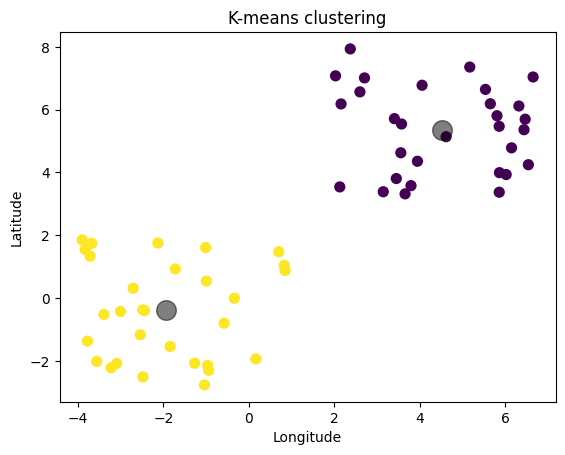

In [307]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)